In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCI_functions.FCI_functions import calculate_pre_score, calculate_post_score, calculate_question_score_post, calculate_question_score_pre

In [3]:
df16_111 = pd.read_excel('rawdata/2016-17 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df16_112 = pd.read_excel('rawdata/2016-17 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_111 = pd.read_excel('rawdata/2014-15 WT1 Phys 111 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_112 = pd.read_excel('rawdata/2014-15 WT1 Phys 112 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_111 = pd.read_excel('rawdata/2015-16 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_112 = pd.read_excel('rawdata/2015-16 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_111 = pd.read_excel('rawdata/2017-18 WT1 Phys 111 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_112 = pd.read_excel('rawdata/2017-18 WT1 Phys 112 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_111 = pd.read_excel('rawdata/2018-19 WT1 Phys 111 ALL Data - Shared with David (20190530).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_112 = pd.read_excel('rawdata/2018-19 WT1 Phys 112 ALL Data - Shared with David (20190527).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_111 = pd.read_excel('rawdata/2019-20 WT1 Phys 111 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_112 = pd.read_excel('rawdata/2019-20 WT1 Phys 112 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)

In [8]:
df_all = pd.concat([df16_111, df16_112, df14_111, df14_112, df15_111, df15_112, df17_111, df17_112, df18_111,
                    df18_112,df19_111, df19_112])
df_all
indices = []
for i in range (0,len(df_all.index)):
    indices.append(i)
df_all.index = indices
df_all

is_f = df_all['PRE Q85']== 'A'
df_all_f = df_all[is_f]

indices = []
for i in range (0,len(df_all_f.index)):
    indices.append(i)
df_all_f.index = indices
df_all_f

,Session,Course,Lecture,Secondary,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,PRE Q4,...,POST Q89,POST Q90,POST Q91,POST Q92,POST Q93,POST Q94,POST Q95,POST Q96,Tertiary Section,Secondary Section
0,2016W,111,1,L03,71.0,B-,C,A,B,A,...,D,B,E,C,A,NaN,NaN,NaN,NaN,NaN
1,2016W,111,1,L02,74.0,B,D,B,A,A,...,C,B,E,B,A,C,C,NaN,NaN,NaN
2,2016W,111,1,L12,49.0,F,C,A,B,E,...,A,D,C,C,A,B,C,NaN,NaN,NaN
3,2016W,111,1,L16,61.0,C,C,D,E,A,...,A,C,C,B,B,D,B,NaN,NaN,NaN
4,2016W,111,1,L01,58.0,C-,C,B,B,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2019W,112,2,NaN,96.0,A+,A,B,A,A,...,A,A,E,E,A,A,B,C,XM2,L12
1328,2019W,112,2,NaN,87.0,A,D,D,B,E,...,C,A,A,D,C,A,B,B,T08,L11
1329,2019W,112,2,NaN,84.0,A-,D,A,C,E,...,E,C,E,D,C,B,B,C,T05,L14
1330,2019W,112,2,NaN,81.0,A-,C,B,B,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T10,L14


In [5]:
def calculate_pre_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1                
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [6]:
def calculate_post_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [9]:
df_all_f['pre_FDM'] = df_all_f.apply(calculate_pre_score_FDM, axis=1)
df_all_f['post_FDM'] = df_all_f.apply(calculate_post_score_FDM, axis=1)
df_all_f['gain_FDM'] = df_all_f['post_FDM']-df_all_f['pre_FDM'] 
df_all_f

<ipython-input-9-158ba53c583a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_f['pre_FDM'] = df_all_f.apply(calculate_pre_score_FDM, axis=1)
<ipython-input-9-158ba53c583a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_f['post_FDM'] = df_all_f.apply(calculate_post_score_FDM, axis=1)
<ipython-input-9-158ba53c583a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,Session,Course,Lecture,Secondary,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,PRE Q4,...,POST Q92,POST Q93,POST Q94,POST Q95,POST Q96,Tertiary Section,Secondary Section,pre_FDM,post_FDM,gain_FDM
0,2016W,111,1,L03,71.0,B-,C,A,B,A,...,C,A,NaN,NaN,NaN,NaN,NaN,2.0,1.0,-1.0
1,2016W,111,1,L02,74.0,B,D,B,A,A,...,B,A,C,C,NaN,NaN,NaN,3.0,2.0,-1.0
2,2016W,111,1,L12,49.0,F,C,A,B,E,...,C,A,B,C,NaN,NaN,NaN,3.0,1.0,-2.0
3,2016W,111,1,L16,61.0,C,C,D,E,A,...,B,B,D,B,NaN,NaN,NaN,6.0,5.0,-1.0
4,2016W,111,1,L01,58.0,C-,C,B,B,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2019W,112,2,NaN,96.0,A+,A,B,A,A,...,E,A,A,B,C,XM2,L12,5.0,3.0,-2.0
1328,2019W,112,2,NaN,87.0,A,D,D,B,E,...,D,C,A,B,B,T08,L11,4.0,3.0,-1.0
1329,2019W,112,2,NaN,84.0,A-,D,A,C,E,...,D,C,B,B,C,T05,L14,4.0,0.0,-4.0
1330,2019W,112,2,NaN,81.0,A-,C,B,B,E,...,NaN,NaN,NaN,NaN,NaN,T10,L14,4.0,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

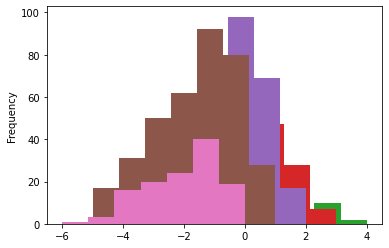

In [10]:
zero = df_all_f[df_all_f['pre_FDM'] == 0]
zero["gain_FDM"].plot.hist(alpha=1, bins=zero["gain_FDM"].value_counts().size)

one = df_all_f[df_all_f['pre_FDM'] == 1]
one["gain_FDM"].plot.hist(alpha=1, bins=one["gain_FDM"].value_counts().size)

two = df_all_f[df_all_f['pre_FDM'] == 2]
two["gain_FDM"].plot.hist(alpha=1, bins=two["gain_FDM"].value_counts().size)

three = df_all_f[df_all_f['pre_FDM'] == 3]
three["gain_FDM"].plot.hist(alpha=1, bins=three["gain_FDM"].value_counts().size)

four = df_all_f[df_all_f['pre_FDM'] == 4]
four["gain_FDM"].plot.hist(alpha=1, bins=four["gain_FDM"].value_counts().size)

five = df_all_f[df_all_f['pre_FDM'] == 5]
five["gain_FDM"].plot.hist(alpha=1, bins=five["gain_FDM"].value_counts().size)

six = df_all_f[df_all_f['pre_FDM'] == 6]
six["gain_FDM"].plot.hist(alpha=1, bins=six["gain_FDM"].value_counts().size)

Text(0.5, 1.0, 'Sixes')

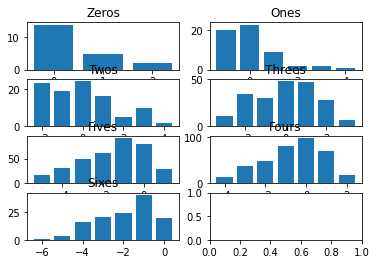

In [11]:
figure, axis = plt.subplots(4, 2)
axis[0, 0].bar(zero["gain_FDM"].value_counts().index, zero["gain_FDM"].value_counts())
axis[0, 0].set_title("Zeros")
axis[0, 1].bar(one["gain_FDM"].value_counts().index, one["gain_FDM"].value_counts())
axis[0, 1].set_title("Ones")
axis[1, 0].bar(two["gain_FDM"].value_counts().index, two["gain_FDM"].value_counts())
axis[1, 0].set_title("Twos")
axis[1, 1].bar(three["gain_FDM"].value_counts().index, three["gain_FDM"].value_counts())
axis[1, 1].set_title("Threes")
axis[2, 1].bar(four["gain_FDM"].value_counts().index, four["gain_FDM"].value_counts())
axis[2, 1].set_title("Fours")
axis[2, 0].bar(five["gain_FDM"].value_counts().index, five["gain_FDM"].value_counts())
axis[2, 0].set_title("Fives")
axis[3, 0].bar(six["gain_FDM"].value_counts().index, six["gain_FDM"].value_counts())
axis[3, 0].set_title("Sixes")

Text(0, 0.5, 'Frequency')

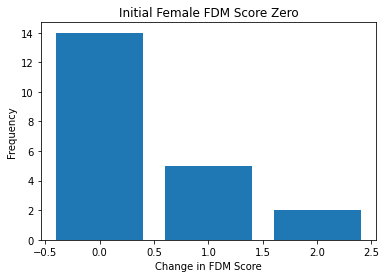

In [18]:
plt.bar(zero["gain_FDM"].value_counts().index, zero["gain_FDM"].value_counts())
plt.title("Initial Female FDM Score Zero")
plt.xlabel('Change in FDM Score')
plt.ylabel('Frequency')

<AxesSubplot:>

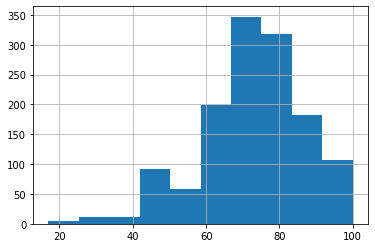

In [44]:
df_all_f['Percent Grade'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x11f414700>,
 'caps': [<matplotlib.lines.Line2D at 0x11f414e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f414370>],
 'medians': [<matplotlib.lines.Line2D at 0x11f41f580>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f41f910>],
 'means': []}

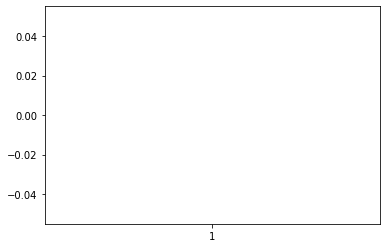

In [58]:
grades = df_all_f["Percent Grade"]
plt.boxplot(grades)